# **A1.2 Regresión lineal**


### **Introducción**

En este reporte se analiza la relación entre el nivel de felicidad y distintas variables mediante modelos de regresión lineal. En una primera etapa, se explora la asociación entre la felicidad y el Producto Interno Bruto (GDP), expresado en trillones de dólares estadounidenses, el cual se considera comúnmente como un indicador del desarrollo económico de un país. En una segunda etapa, el análisis se amplía hacia un enfoque más realista, incorporando variables adicionales relacionadas con diferentes dimensiones del bienestar, como el bienestar económico individual, el apoyo social y la salud. A través de un modelo de regresión lineal múltiple, se evalúa el impacto de estas variables sobre el nivel de felicidad y se comparan sus efectos con el del GDP total.

### **Exploración y contextualización de los datos**
El conjunto de datos utilizado en este reporte integra información de 141 países. La variable principal de interés es el índice de felicidad, el cual corresponde a un puntaje compuesto que resume el nivel promedio de bienestar reportado por la población de cada país. Este índice se complementa con variables económicas, como el GDP total y el GDP per cápita, así como con indicadores sociales y de salud. En conjunto, estas variables proporcionan una base adecuada para evaluar y comparar la capacidad explicativa de un modelo de regresión lineal simple y un modelo de regresión lineal múltiple.

In [ ]:
import pandas as pd
df = pd.read_csv('A1.2 Felicidad y GDP.csv')
display(df)

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11
...,...,...,...
136,Botswana,3.4711,1.493007e+10
137,Rwanda,3.2682,1.018435e+10
138,Zimbabwe,2.9951,1.805117e+10
139,Lebanon,2.9553,2.594892e+10


### **Modelo de regresión lineal simple**
Para iniciar el análisis, se planteó un modelo de regresión lineal simple que relaciona el nivel de felicidad con el Producto Interno Bruto (GDP). Esta variable se eligió porque es un indicador común del desarrollo económico de un país y, de manera general, se espera que economías más grandes cuenten con mayores recursos para mejorar las condiciones de vida de su población. El GDP fue expresado en trillones de dólares estadounidenses para facilitar la interpretación de los resultados.

La gráfica de dispersión muestra una tendencia positiva general entre el GDP y el nivel de felicidad, lo que indica que los países con mayor GDP tienden a presentar niveles más altos de felicidad. Sin embargo, también se observa una alta dispersión de los datos, ya que países con valores similares de GDP pueden tener niveles de felicidad muy distintos. Además, unos pocos países con economías muy grandes influyen de forma importante en el ajuste del modelo.

El coeficiente estimado del GDP es positivo, lo que sugiere que un aumento en el tamaño de la economía se asocia con un incremento en el nivel de felicidad. No obstante, su magnitud es reducida, lo que indica que el efecto del GDP por sí solo es limitado. En conjunto, estos resultados muestran que el GDP aporta información relevante, pero no es suficiente para explicar por sí solo las diferencias en el nivel de felicidad entre países, lo que justifica la incorporación de variables adicionales en un modelo de regresión lineal múltiple.

Intercept: 5.51
Coefficient for GDP (trillones USD): 0.0850881608


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


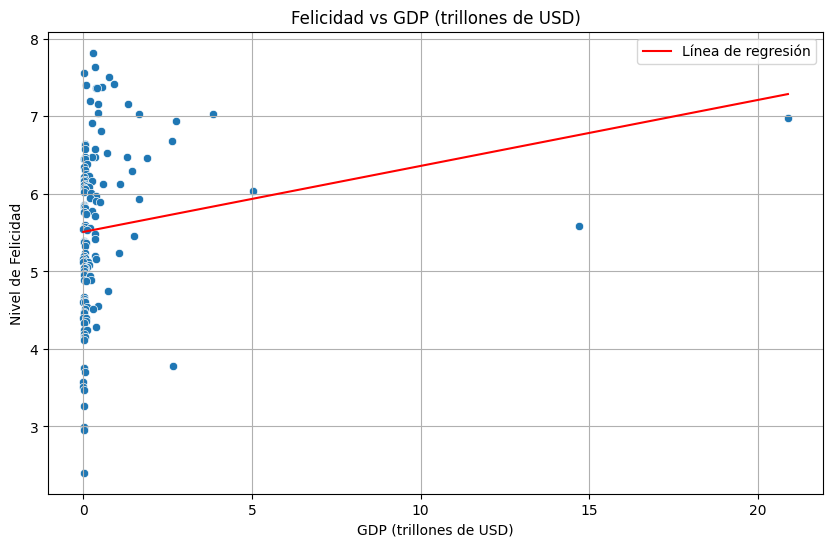

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df['GDP_trillones'] = df['GDP'] / 1_000_000_000_000

X = df[['GDP_trillones']]
y = df['Felicidad']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for GDP (trillones USD): {model.coef_[0]:.10f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['GDP_trillones'], y=df['Felicidad'])

gdp_range = np.linspace(df['GDP_trillones'].min(), df['GDP_trillones'].max(), 100).reshape(-1, 1)
predicted_felicidad = model.predict(gdp_range)

plt.plot(gdp_range, predicted_felicidad, color='red', label='Línea de regresión')
plt.xlabel('GDP (trillones de USD)')
plt.ylabel('Nivel de Felicidad')
plt.title('Felicidad vs GDP (trillones de USD)')
plt.grid(True)
plt.legend()
plt.show()





### **Extensión del conjunto de datos**
Para ampliar el análisis hacia un escenario más realista, se incorporaron variables adicionales provenientes de fuentes públicas y confiables que permiten capturar distintas dimensiones del bienestar. En particular, se utilizó información del World Happiness Report, disponible públicamente y basada en encuestas internacionales estandarizadas, así como indicadores económicos y de salud ampliamente utilizados en estudios comparativos entre países. Esta fuente recopila datos de más de 150 países y es reconocida por su consistencia metodológica y su uso en análisis académicos.


Además del índice de felicidad, se integraron tres variables adicionales consideradas relevantes para explicar el bienestar de la población.


*   GDP per cápita: Refleja el nivel promedio de ingreso individual en un país. Esta variable se asocia directamente con el bienestar económico de las personas

*   Apoyo social: Mide la percepción de las personas sobre la disponibilidad de redes de apoyo en caso de necesidad. Esta variable representa una dimensión social del bienestar.

*   Esperanza de vida: Utilizada como un indicador del estado general de salud y de la calidad de vida de la población. Una mayor esperanza de vida suele estar asociada con mejores sistemas de salud, mejores condiciones de vida y mayor seguridad.


En conjunto, estas variables permiten capturar dimensiones económicas, sociales y de salud que no son completamente explicadas por el GDP total. Por esta razón, se espera que algunas de ellas, presenten una mayor influencia en el nivel de felicidad que el GDP de un país, el cual únicamente refleja el tamaño total de la economía y no necesariamente el bienestar de la población.

In [ ]:
df_happy = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/happy.csv")
df_happy = df_happy.rename(columns={
    "Happiness.Score": "Felicidad",
    "Economy..GDP.per.Capita.": "GDP_per_capita",
    "Health..Life.Expectancy.": "Esperanza_vida",
})
# Renombrar country a pais
df_happy = df_happy.rename(columns={'Country': 'Pais'})



df_final = df.merge(df_happy, on='Pais', how='inner')

df_modelo = df_final[[
    'Pais',
    'Felicidad_x',
    'GDP',
    'GDP_per_capita',
    'Family',
    'Esperanza_vida'
]].rename(columns={'Felicidad_x': 'Felicidad'})


display(df_modelo)

,Pais,Felicidad,GDP,GDP_per_capita,Family,Esperanza_vida
0,Finland,7.8210,2.718370e+11,1.40598,1.13464,0.81091
1,Denmark,7.6362,3.560850e+11,1.44178,1.16374,0.79504
2,Iceland,7.5575,2.171808e+10,1.42666,1.18326,0.86733
3,Switzerland,7.5116,7.522480e+11,1.52733,1.14524,0.86303
4,Netherlands,7.4149,9.138650e+11,1.46468,1.02912,0.81231
...,...,...,...,...,...,...
129,Botswana,3.4711,1.493007e+10,1.09426,0.89186,0.34752
130,Rwanda,3.2682,1.018435e+10,0.32846,0.61586,0.31865
131,Zimbabwe,2.9951,1.805117e+10,0.35041,0.71478,0.15950
132,Lebanon,2.9553,2.594892e+10,1.12268,0.64184,0.76171


### **Modelo de regresión lineal múltiple**
A partir del conjunto de datos extendido, se estimó un modelo de regresión lineal múltiple con el objetivo de analizar la relación entre el nivel de felicidad y un conjunto de variables económicas, sociales y de salud. El modelo incluye como variables explicativas el GDP total, el GDP per cápita, el apoyo social y la esperanza de vida, mientras que la variable dependiente es el índice de felicidad.

El modelo estimado puede representarse de la siguiente forma:

Felicidad = 𝛽0 + 𝛽1 (GDP) + 𝛽2 (GDP per cápita) + 𝛽3 (Apoyo social) + 𝛽4 (Esperanza de vida) + 𝜀

El intercepto del modelo tiene un valor aproximado de 2.80, el cual representa el nivel estimado de felicidad cuando todas las variables explicativas toman el valor de cero.

- El coeficiente asociado al GDP total es  pequeño y cercano a cero.

- El GDP per cápita presenta un coeficiente positivo de aproximadamente 0.48. Este coeficiente refleja la relación entre el ingreso promedio individual y el bienestar reportado.

- La variable de apoyo social muestra un coeficiente positivo cercano a 1.48. Este coeficiente representa el efecto de las relaciones sociales y las redes de apoyo sobre el bienestar percibido.

- La esperanza de vida presenta el coeficiente positivo de mayor magnitud, aproximadamente 1.96.

In [ ]:
df_modelo['GDP_trillones'] = df_modelo['GDP'] / 1_000_000_000_000

X = df_modelo[['GDP_trillones', 'GDP_per_capita', 'Family', 'Esperanza_vida']]
y = df_modelo['Felicidad']

from sklearn.linear_model import LinearRegression
modelo_multiple = LinearRegression()
modelo_multiple.fit(X, y)

print("Intercepto:", modelo_multiple.intercept_)
for var, coef in zip(X.columns, modelo_multiple.coef_):
    print(f"{var}: {coef}")


Intercepto: 2.801532124133698
GDP_trillones: 0.00042592766571879074
GDP_per_capita: 0.4817816613663799
Family: 1.476853744603947
Esperanza_vida: 1.9576052263657449


### **Comparación de modelos y conclusiones**
El modelo de regresión lineal simple mostró que existe una relación positiva entre el GDP y la felicidad, pero con mucha variación entre países. Esto indica que el GDP por sí solo no explica bien las diferencias en el nivel de felicidad.

Al usar un modelo de regresión lineal múltiple, que incluye el GDP per cápita, el apoyo social y la esperanza de vida, el modelo explica mejor la felicidad. En este caso, el GDP total deja de ser tan importante, mientras que las variables relacionadas con el bienestar individual, social y de salud tienen una relación más clara con la felicidad.

En este trabajo se analizó la relación entre la felicidad y distintas variables económicas, sociales y de salud utilizando modelos de regresión lineal. Primero, se usó un modelo simple para analizar la relación entre la felicidad y el GDP. Aunque se observó una relación positiva, los resultados mostraron mucha variación entre países, lo que indica que el tamaño de la economía no es suficiente para explicar por sí solo el nivel de felicidad.

Después, se utilizó un modelo de regresión lineal múltiple que incluyó el GDP per cápita, el apoyo social y la esperanza de vida. Con este modelo se logró una mejor explicación de la felicidad, ya que estas variables están más relacionadas con la calidad de vida de las personas. En este caso, el GDP total perdió importancia frente a factores que reflejan el bienestar individual, las relaciones sociales y la salud.

Los resultados muestran que la felicidad depende de varios factores y no solo del crecimiento económico. Tener mejores ingresos a nivel personal, contar con apoyo social y gozar de buena salud tiene un impacto mayor en el bienestar de las personas que el tamaño total de la economía de un país. Sin embargo, el análisis tiene algunas limitaciones, como el número de países disponibles y el uso de datos de un solo año.

En general, este estudio confirma que la felicidad es una emocion compleja y que para entenderla mejor es necesario considerar diferentes dimensiones del bienestar, no solo variables económicas generales.